# This project is about Retrival Augumented Generation (RAG), this is AI technique that allows Large Language model to access the recent up-to date information outside of their training set to provide better answer and improved result! Some key-terms regarding RAG

1. Retrieval augmented generation (RAG): A technique in AI where a large language model accesses new or recent data outside its training set to provide better answers and improved results.

2. Vector database: A search engine or database that stores vectorized documents, enabling more accurate information retrieval for AI mode.
3. Embeddings-: Representations of text data as vectors in a high-dimensional space, allowing similarity comparisons between different pieces textfx4
4. 
Azure AI Search: Microsoft's cloud-based search service (formerly Azure Cognitive Services Search) that offers retrieval augmentation capabilitie     s for largeanguagege mods.
5. 

Comma separated value (CSV): A common data format where values are separated by commas, used in this transcript to demonstrate RAG implementation with actor database
6. e.

Pandas library: A Python library used for data manipulation and analysis, particularly useful when workiwV filesh CSles.

Qdrant: Software used for creating an in-memory vector database search, enabling efficient text refrom embedding storagebeddorage.

Sentence transformers: A tool to encode sentences into numerical representations (embeddings) that can be compared using cosine  andsimilarity oista9

9. nc
9. metrics.

Cosine distance: A measure of similarity between two non-zero vectors in a multi-dimensional space, often used in text analysis and information retrieval.


In [4]:
# Lets import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
# lets import the wine dataset in panda's dataframe
data = pd.read_csv('top_rated_wines.csv')

In [29]:
data.tail(50)

,name,region,variety,rating,notes
1315,Lail Georgia Sauvignon Blanc 2014,"Yountville, Napa Valley, California",White Wine,96.0,"The 2014 Georgia is gorgeous! Intense, precise..."
1316,Lail J. Daniel Cuvee Cabernet Sauvignon (1.5 L...,"Napa Valley, California",Red Wine,99.0,The 2013 growing season could be the equal of ...
1317,Lail J. Daniel Cuvee Cabernet Sauvignon 2007,"Napa Valley, California",Red Wine,96.0,If I had to use one word to describe this wine...
1318,Lail J. Daniel Cuvee Cabernet Sauvignon 2013,"Napa Valley, California",Red Wine,99.0,The 2013 growing season could be the equal of ...
1319,Lail J. Daniel Cuvee Cabernet Sauvignon 2015,"Napa Valley, California",Red Wine,98.0,The 2015 vintage yielded a small crop of excep...
1320,Lamborghini Campoleone 1999,"Campania, Italy",Red Wine,96.0,"Long-term aging, elegant and complex red wine ..."
1321,Lancaster Cabernet Sauvignon (375ML half-bottl...,"Sonoma County, California",Red Wine,97.0,"""Its a gorgeous Cab, softly complex, rich in c..."
1322,Lancaster Estate Cabernet Sauvignon 2004,"Sonoma County, California",Red Wine,97.0,"""Its a gorgeous Cab, softly complex, rich in c..."
1323,Langmeil The Freedom 1843 Shiraz 2016,"Barossa Valley, Barossa, South Australia, Aust...",Red Wine,97.0,Deep crimson with purple hues. An intense arom...
1324,Larkmead Cabernet Sauvignon 2004,"Napa Valley, California",Red Wine,96.0,"Our favorite estate Cabernet to date, the new ..."


In [16]:
# Lets check the dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     1365 non-null   object 
 1   region   1364 non-null   object 
 2   variety  1347 non-null   object 
 3   rating   1365 non-null   float64
 4   notes    1365 non-null   object 
dtypes: float64(1), object(4)
memory usage: 53.4+ KB


In [17]:
# Lets describe the dataframe
data.describe()

,rating
count,1365.000000
mean,96.859341
std,0.995957
min,96.000000
25%,96.000000
50%,97.000000
75%,98.000000
max,99.000000


In [18]:
# Lets check for the null
data.isnull().sum()

name        0
region      1
variety    18
rating      0
notes       0
dtype: int64

<Axes: >

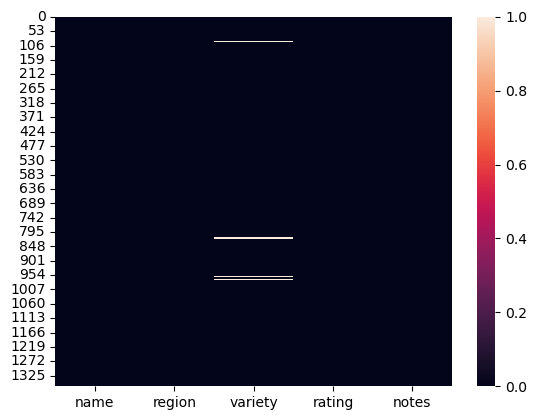

In [19]:
# Lets check the null element using sns.heatmap
sns.heatmap(data.isnull())

In [20]:
# Lets remove the null values
data = data[data['variety'].notna()]
# data.dropna(inplace = True)

In [21]:
data.isnull().sum()

name       0
region     0
variety    0
rating     0
notes      0
dtype: int64

In [25]:
# lets convert the dataframe into dict
datadict = data.to_dict('records')  # records is the return orientation of the dict, how the data in the dict is organised

In [1]:
from sentence_transformers import SentenceTransformer # sentence transformer are used convert sentence into embeddings

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
from qdrant_client import models, QdrantClient # Qdrant is the in-memory vector databases used to store vectore embedding 

In [22]:
# Lets define the model to create embeddings
encoder = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [23]:
# Lets create a vector database client
qdrant = QdrantClient(":memory:")

In [24]:
# Create collection to store books
qdrant.recreate_collection(
    collection_name="top_wines",
    vectors_config=models.VectorParams(
        size= encoder.get_sentence_embedding_dimension(), # Vector size is defined by used model 
        distance=models.Distance.COSINE
    )
)

C:\Users\HP\AppData\Local\Temp\ipykernel_7540\1748158206.py:2: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  qdrant.recreate_collection(


True

In [26]:
# Lets vectorised, meaning covert sentence into embedding
qdrant.upload_records(
    collection_name="top_wines",
    records=[
        models.Record(
            id=idx,
            vector=encoder.encode(doc["notes"]).tolist(),
            payload=doc
        ) for idx, doc in enumerate(datadict) # datadict is the variable holding all wines 
     ]
)

C:\Users\HP\AppData\Local\Temp\ipykernel_7540\2783241669.py:2: DeprecationWarning: `upload_records` is deprecated, use `upload_points` instead
  qdrant.upload_records(


In [58]:
# lets search the awesome wines from the vector store

prompt = "Suggest me amazing wine from India"
hits = qdrant.search(
    collection_name='top_wines',
    query_vector=encoder.encode(prompt).tolist(),
    limit=3
)

for hit in hits:
    print(hit.payload, "score:", hit.score)

{'name': 'Krug Vintage Brut 1990', 'region': 'Champagne, France', 'variety': 'Sparkling & Champagne', 'rating': 96.0, 'notes': '"A profound wine of great depth and complexity. Its detailed flavors range from citrus and ginger to whole grain bread and woodsy richness, with accents of honey and nuts. Retains its focus thanks to a vibrant structure, all the time carrying its weight with authority and grace. Fine, smoky finish. Drink now through 2020. 1,500 cases imported." - Wine Spectator '} score: 0.5804094572847869
{'name': 'Greenock Creek Alices Shiraz 2002', 'region': 'Barossa Valley, Barossa, South Australia, Australia', 'variety': 'Red Wine', 'rating': 96.0, 'notes': 'Rich and fleshy, with pretty coffee, plum, wild berry and spice notes that are smooth and polished, long and flavorful.  An extremely limited release wine from one of Australia\'s "Cult" wineries.'} score: 0.5795236960104202
{'name': "Greenock Creek Alice's Shiraz 2003", 'region': 'Barossa Valley, Barossa, South Austr

In [42]:
# Using RAG with LLM
# first lets hold the search result
search_result = [hit.payload for hit in hits]

In [47]:
# Lets import libraries
from openai import OpenAI
from dotenv import load_dotenv
import os

In [60]:
# lets connect to Open AI LLM
load_dotenv('apikey.env')
APIKEY = os.getenv('APIKEY')
client = OpenAI(
    api_key=APIKEY
)
completion = client.chat.completions.create(
    model = 'gpt-3.5-turbo',
    messages = [
    {
      "role": "system",
      "content": "You are a chatbot a wine specialist, your top priority is to guide users on best wine selection"
    },
    {
      "role": "user",
      "content": "Suggest me amazing wine from India"
    },
    {
      "role": "assistant",
      "content": str(search_result)
    }
    ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='I apologize for the confusion in my previous response. As a wine specialist, I must clarify that India is not traditionally known for its wine production. However, there are some emerging wine regions in India such as Nashik, Karnataka, and Maharashtra that produce some high-quality wines. I recommend exploring wines from Sula Vineyards, Grover Zampa, and Fratelli Vineyards as they are among the leading wine producers in India. Look for their reds, whites, and rosés to experience the diverse range of wines coming from this up-and-coming region.', role='assistant', function_call=None, tool_calls=None, refusal=None)
